In [1]:
import os
from tqdm import tqdm
from glob import glob

import numpy as np
import pandas as pd

import cv2
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
def detect_and_crop_coin_from_background(img_save_path, img_file_name, 
                                         blur_kernel_size = 15, dp = 1, minDist = 50, param1 = 50, param2 = 30, minRadius = 20):
    img = Image.open(img_file_name)
    img = np.asarray(img)
    
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray_img, (blur_kernel_size, blur_kernel_size), 0)

    h, w = blurred.shape
    circles = cv2.HoughCircles(blurred,
                               cv2.HOUGH_GRADIENT,
                               dp = dp, 
                               minDist = minDist,
                               param1 = param1,
                               param2 = param2,
                               minRadius = minRadius,
                               maxRadius = max(int(h/2), int(w/2)))
    
    circles = np.round(circles[0, :]).astype("int")
    valid_circles = [circle for circle in circles if circle[2] > 30]
    best_circle = max(valid_circles, key = lambda x: x[2])

    x, y, r = best_circle

    mask = np.zeros_like(img, dtype = 'uint8')
    cv2.circle(mask, (x, y), r, (255, 255, 255), -1)
    mask_1 = mask[:, :, 0]

    cropped = cv2.bitwise_and(img, img, mask = mask_1)
    
    if not os.path.exists(img_save_path):
        os.makedirs(img_save_path)

    img_name = img_file_name.split('/')[-1].split('.')[0]
    cv2.imwrite(f"{img_save_path}/{img_name}.jpg", cv2.cvtColor(cropped, cv2.COLOR_RGB2BGR))

# Nickels

In [3]:
nickel_save_path = "./nickels_cropped"
nickel_path = "./nickels"
nickel_files = glob(f"{nickel_path}/*")

In [4]:
for file in tqdm(nickel_files):
    detect_and_crop_coin_from_background(nickel_save_path, file)

100%|██████████| 1214/1214 [10:11<00:00,  1.99it/s]


# Quarters

In [5]:
quarters_save_path = "./quarters_cropped"
quarters_path = "./quarters"
quarters_files = glob(f"{quarters_path}/*")

In [6]:
for file in tqdm(quarters_files):
    detect_and_crop_coin_from_background(quarters_save_path, file)

100%|██████████| 1250/1250 [21:52<00:00,  1.05s/it]


# Cents

In [7]:
cents_save_path = "./cents_cropped"
cents_path = "./cents"
cents_files = glob(f"{cents_path}/*")

In [8]:
for file in tqdm(cents_files):
    detect_and_crop_coin_from_background(cents_save_path, file)

 73%|███████▎  | 932/1285 [08:35<03:15,  1.81it/s]


ValueError: max() arg is an empty sequence

In [46]:
troubles = [
    './cents/Lincoln Cent 47672_105 Obverse.jpg',
    './cents/Lincoln Cent 47672_12 Reverse.jpg',
    './cents/Lincoln Cent 47672_130 Obverse.jpg',
    './cents/Lincoln Cent 47672_163 Reverse.jpg',
    './cents/Lincoln Cent 47672_194 Obverse.jpg',
    './cents/Lincoln Cent 47672_207 Obverse.jpg',
    './cents/Lincoln Cent 47672_222 Reverse.jpg',
]
for file in tqdm(cents_files[1064:]):
    try:
        detect_and_crop_coin_from_background(cents_save_path, file)
    except:
        troubles.append(file)

100%|██████████| 221/221 [00:11<00:00, 18.99it/s]


In [47]:
troubles

['./cents/Lincoln Cent 47672_105 Obverse.jpg',
 './cents/Lincoln Cent 47672_12 Reverse.jpg',
 './cents/Lincoln Cent 47672_130 Obverse.jpg',
 './cents/Lincoln Cent 47672_163 Reverse.jpg',
 './cents/Lincoln Cent 47672_194 Obverse.jpg',
 './cents/Lincoln Cent 47672_207 Obverse.jpg',
 './cents/Lincoln Cent 47672_222 Reverse.jpg',
 './cents/Lincoln Cent 47672_226 Reverse.jpg',
 './cents/Lincoln Cent 47672_227 Reverse.jpg',
 './cents/Lincoln Cent 47672_248 Obverse.jpg',
 './cents/Lincoln Cent 47672_39 Obverse.jpg',
 './cents/Lincoln Cent 47672_44 Reverse.jpg',
 './cents/Lincoln Cent 47672_70 Obverse.jpg',
 './cents/Lincoln Cent 47672_92 Reverse.jpg']

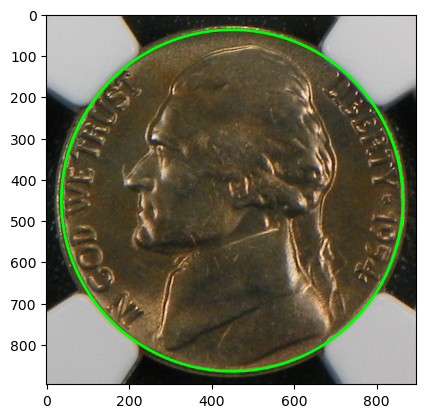

In [53]:
img = Image.open(nickel_files[100])
img = np.asarray(img)
plt.imshow(img)

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray_img, (15, 15), 0)

circles = cv2.HoughCircles(
    blurred,
    cv2.HOUGH_GRADIENT,
    dp = 1,
    minDist = 50,
    param1 = 50,
    param2 = 30,
    minRadius = 20
)

circles = np.round(circles[0, :]).astype("int")
valid_circles = [circle for circle in circles if circle[2] > 30]
best_circle = max(valid_circles, key=lambda x: x[2])

plt.imshow(img)

ax = plt.gca()
x, y, r = best_circle
best_circle_patch = plt.Circle((x, y), r, color='lime', fill=False, linewidth=2)
ax.add_patch(best_circle_patch)

plt.show()

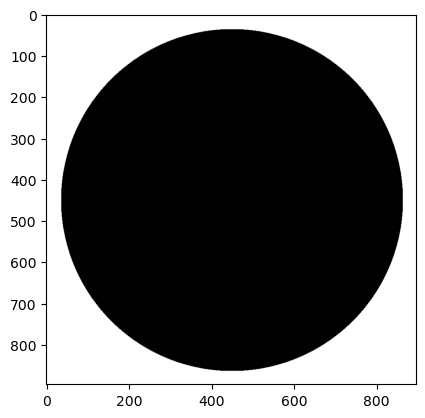

In [57]:
mask = np.ones_like(img, dtype = 'uint8')
cv2.circle(mask, (x, y), r, (0, 0, 0), -1)
mask_1 = mask[:, :, 0]
plt.imshow(mask_1, cmap = 'gray')

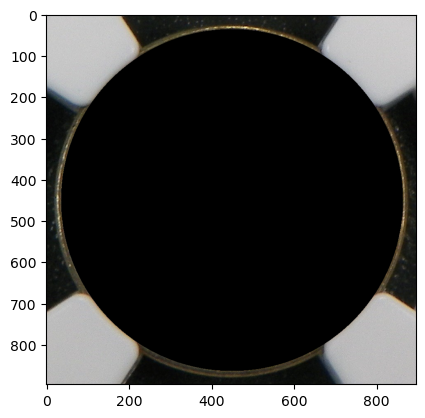

In [58]:
cropped = cv2.bitwise_and(img, img, mask = mask_1)
plt.imshow(cropped)